In [43]:
import pandas as pd
import numpy as np

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
dataSet = pd.read_csv("D:\\Data Science\\Machine Learning\\Linear Regression\\Assignment\\Ecommerce_Customers")

In [46]:
dataSet.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [47]:
dataSet.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [48]:
dataSet = dataSet.drop(['Email','Address','Avatar'],axis=1)

In [49]:
dataSet.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


## Intoducing 'Interaction Terms' by combining App and Website

#### Note : Interaction terms will exist along with original variables. 

In [50]:
dataSet['App & Website'] = dataSet['Time on App']*dataSet['Time on Website']

In [51]:
dataSet.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,App & Website
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088,-0.034848
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328,0.952280
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641,0.381614
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084,0.012186
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000,0.462282
App & Website,-0.034848,0.952280,0.381614,0.012186,0.462282,1.000000


### Pair plot
#### Pair plot is used to find pair to pair relationships in a dataset

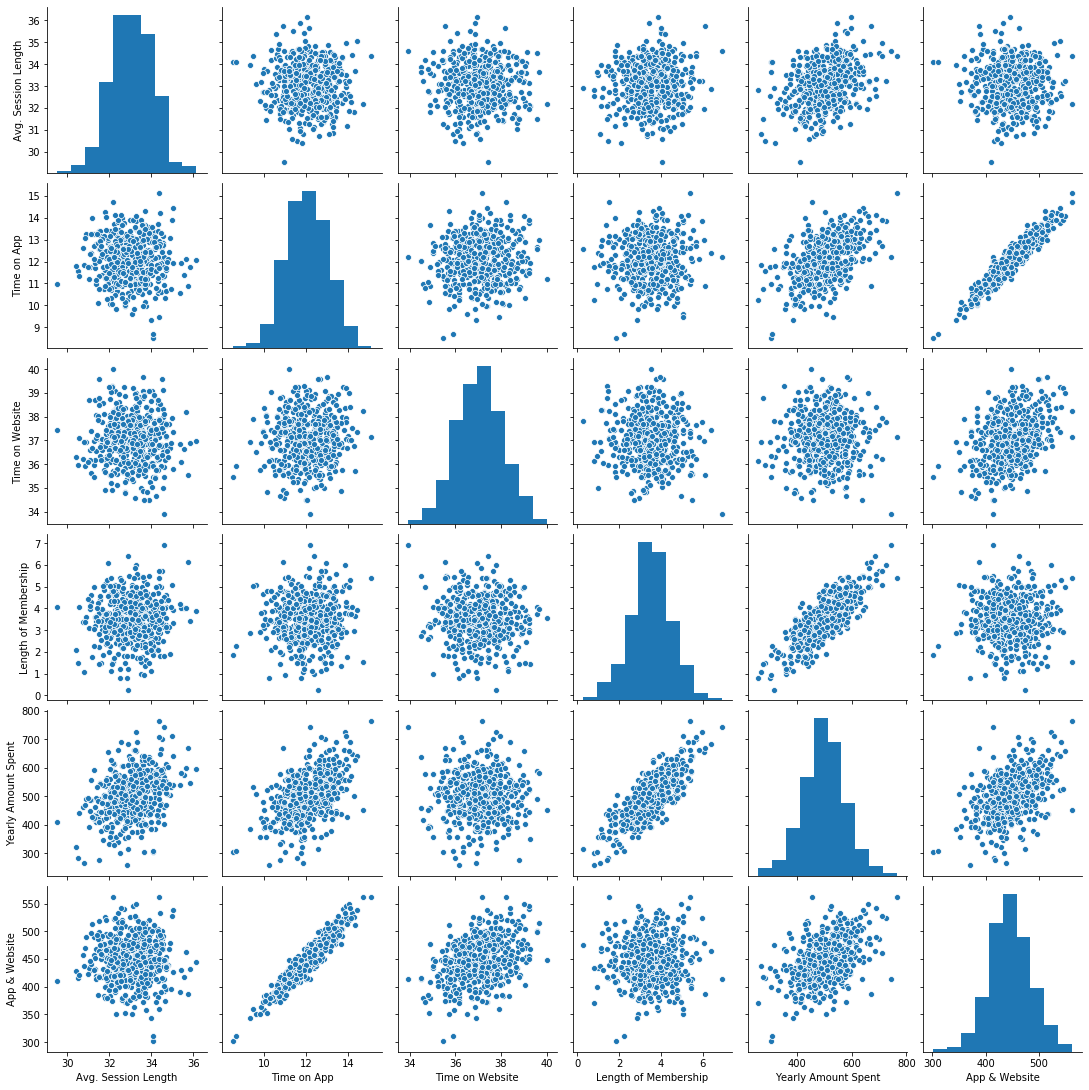

In [52]:
sns.pairplot(dataSet,palette='husl')

### Distribution plot
#### Dist plot is used to visualise how yearly amount spent data is distributed

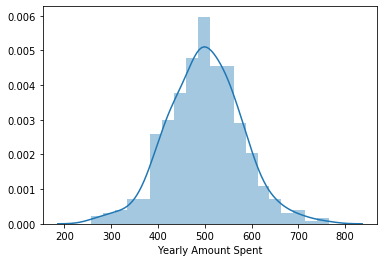

In [54]:
sns.distplot(dataSet['Yearly Amount Spent'])

###  The Target variable must be dropped from X_train and to be included as Y_train or Y_actual. if it's included in training X dataset, r2 value will be 100% which is never achievable in real time scenarios.

In [55]:
X = dataSet.drop('Yearly Amount Spent',axis=1)
Y = dataSet['Yearly Amount Spent']

In [56]:
from sklearn.model_selection import train_test_split    ##lib for test train split

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=101)   ##Random state must be assigned with some integer value to avoid different data points in each run

In [58]:
X_train.shape

(300, 5)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scx=StandardScaler()

In [61]:
X_train_std = scx.fit_transform(X_train)          ##while training the data points must be transformed and fitted to model and for testing, fitting must not be done
X_train_std

array([[ 1.26799522,  1.45940118,  0.23617032,  0.09143508,  1.42336584],
       [ 1.09362244,  1.22111315,  1.88136988, -0.283246  ,  1.74650913],
       [-1.75352154,  0.1119345 , -1.69436204, -0.44196072, -0.41528647],
       ...,
       [-1.1990249 ,  0.46066757,  0.38023355, -0.53918796,  0.54149153],
       [ 0.83265112, -0.46928258,  0.02145387,  0.19843404, -0.42913441],
       [-0.84063534, -0.67939728,  1.18861913,  1.29228412, -0.28941163]])

In [62]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lr.coef_

array([25.69685599, 40.90234031,  1.53943998, 61.65265071, -0.08122977])

In [66]:
lr.intercept_

-1081.5664505539298

In [67]:
prediction = lr.predict(X_test)

In [68]:
from sklearn.metrics import r2_score

In [69]:
r2_score(Y_test,prediction)

0.9855280100695725

In [70]:
ridge = Ridge(alpha=0.01)

In [71]:
ridge.fit(X_train_std,Y_train)                 #datapoints must be standardised for ridge

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
X_test_std = scx.transform(X_test)

In [73]:
pred_ridge = ridge.predict(X_test_std)

In [74]:
r2_score(Y_test, pred_ridge)

0.9855127835811839

In [75]:
lasso = Lasso(alpha=0.01)

In [76]:
lasso.fit(X_train_std,Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
pred_lasso=lasso.predict(X_test_std)

In [78]:
r2_score(Y_test, pred_lasso)

0.9855010649354233